ASSIGNMENT 4: Fraud Detection Using an Autoencoder and Variational Autoencoder

TEAM:
1. PUNEET KUMAR RAJAN                - AI23MTECH11010
2. ANISH PAWAR                       - AI23MTECH14002
3. ANKIT PANDEY                      - AI23MTECH13002
4. VIVEK TARACHANDANI                - AI23MTECH14008
5. AAYUSH SHRIVASTAVA                - CS24MTECH02001


TASK:

1. Max 5 members per team.
2. Develop a neural autoencoder for detecting fraudulent transactions within a dataset.
3. The dataset contains 284,807 credit card transactions, of which 492 are fraudulent.
4. The dataset contains 30 attributes, including 28 principal components, the time between each transaction and the first transaction in the data set, and the amount paid for each transaction.
5. You can consider converting time difference and amount features into log scale for dynamic range compression,
6. Your objective includes designing an autoencoder and justifying the choices made for its architecture, and loss function.
7. For the evaluation phase, you are required to utilize the prediction score and F1 score to assess the model's performance on the test data.
8. Repear similar steps to design the fraud detection model using the Variational Autoencoder.

IMPORTING ALL THE IMPORTANT AND USEFUL LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

from torch.optim import Adam
from torch.utils.data import DataLoader, TensorDataset
import torch
from torch import nn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score, precision_recall_curve, roc_curve

LOADING DATA AND VISUALISING IT

In [ ]:
# Load the dataset
data = pd.read_csv('/home/puneetrajan/Desktop/Fraud/creditcard.csv')
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


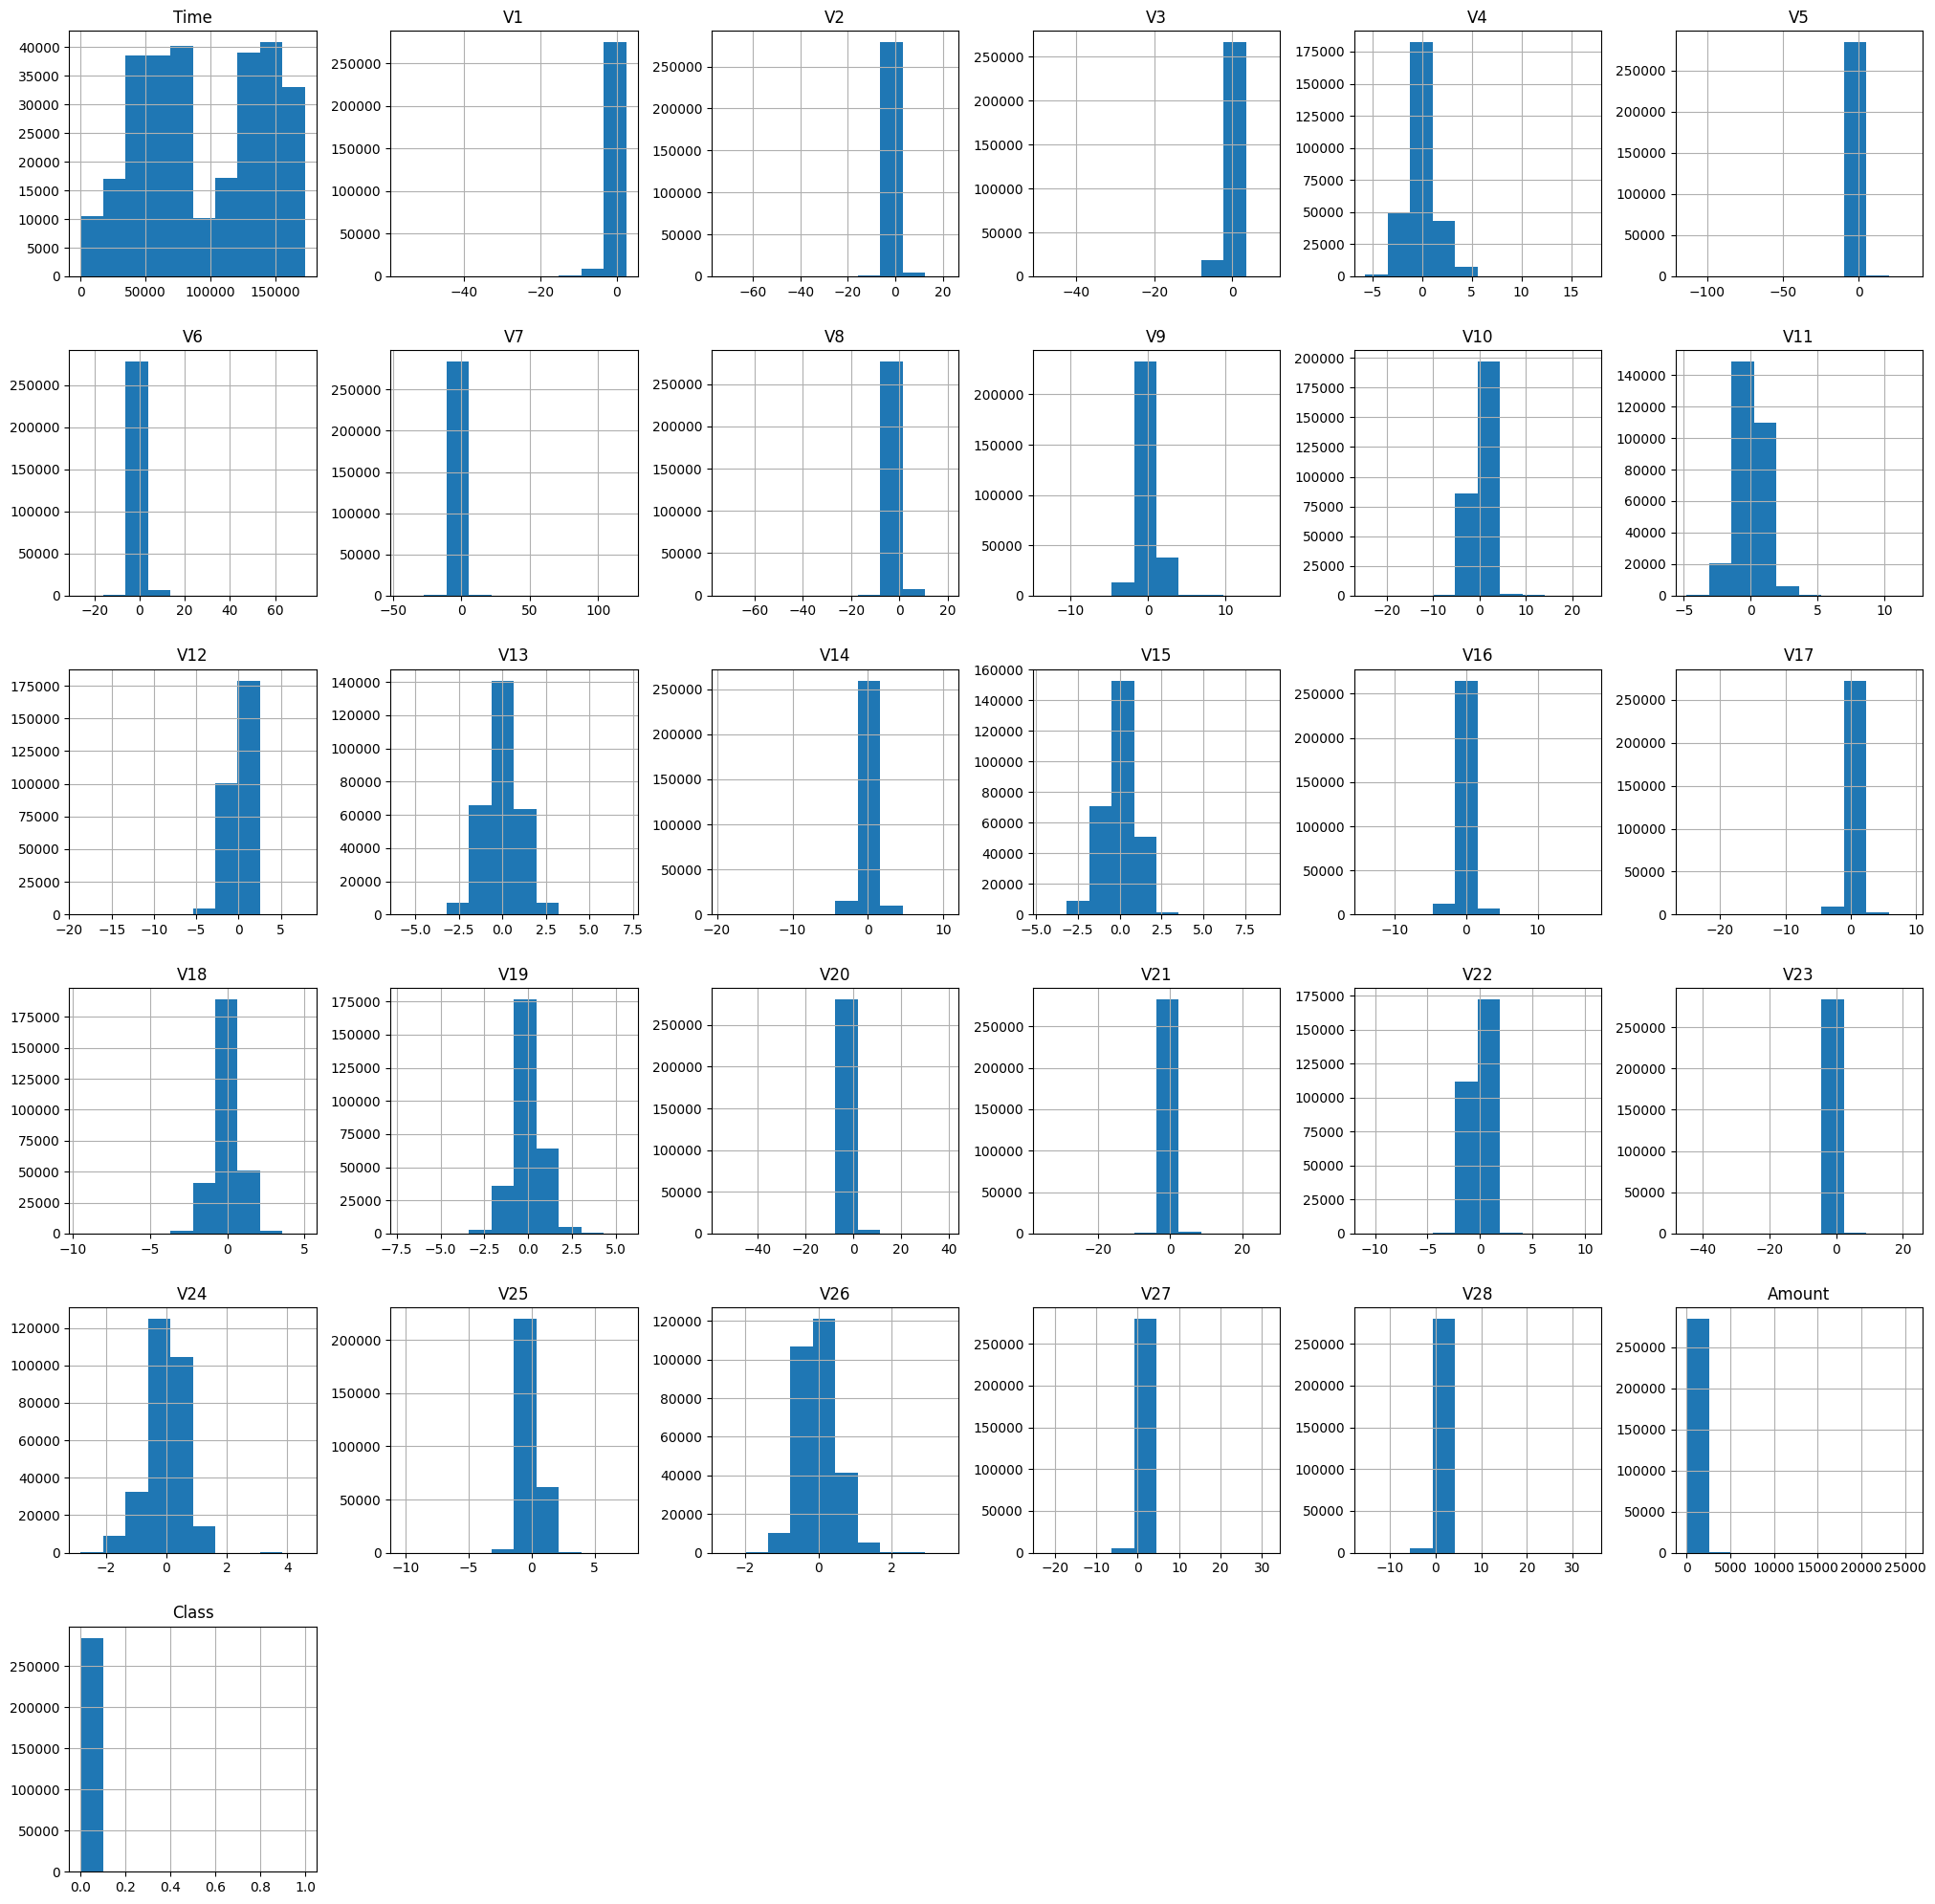

In [ ]:
#Visualizing the data
data.hist(figsize = (25, 25))
plt.show()

In [ ]:
#fraud and non-fraud data
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))
print('Outlier Fraction: {}'.format(outlierFraction))

Fraud Cases: 492
Valid Transactions: 284315
Outlier Fraction: 0.0017304750013189597


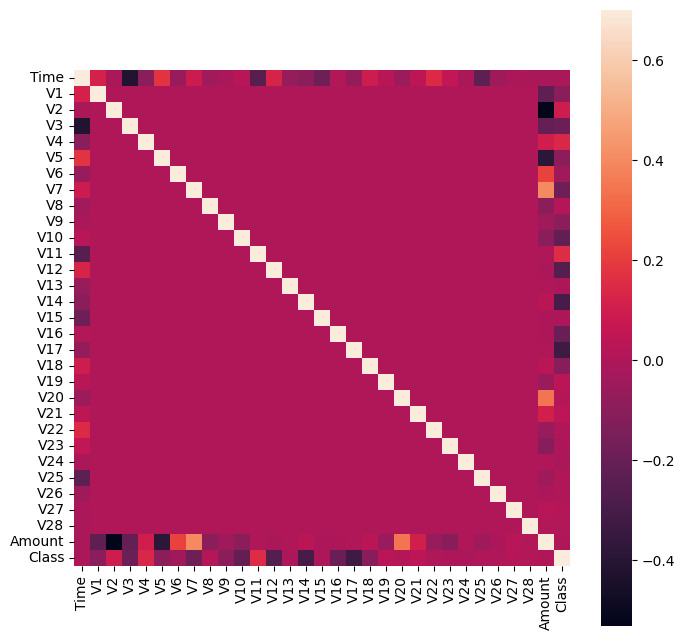

In [ ]:
#Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (8, 8))
import seaborn as sns
sns.heatmap(corrmat, vmax = .7, square = True)
plt.show()

DATA PREPROCESSING

*DROPING TIME - Time is irrelevent for this particular task because we are not predicting sequential outputs.*

*DROPING CLASS - Since, we are mixing all the class 1 and class 0 data, and also we will be training our model on non-fraud data points.*

*Taking Fraud Class as Anomaly*

In [ ]:
df = data.drop(columns=['Time'])
df_normal = df[df['Class'] == 0].drop(columns=['Class'])
df_anomaly = df[df['Class'] == 1].drop(columns=['Class'])

In [ ]:
# Split normal data into training and testing datasets
train_df_normal, test_df_normal = train_test_split(df_normal.to_numpy(), test_size=0.1, random_state=42)

# Combine the test set of normal transactions with all anomalous transactions
test_data = np.vstack([test_df_normal, df_anomaly.to_numpy()])

# Data for training
train_data = train_df_normal

# Scaling the data
scaler = StandardScaler()
scaler.fit(train_data)  # Fit only on training data
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

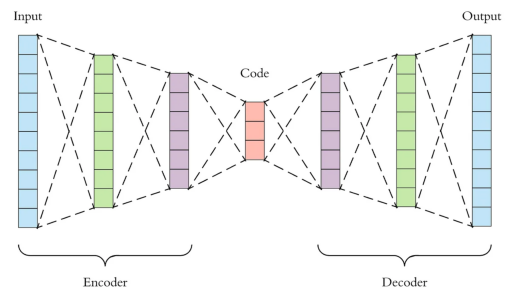

In [ ]:
img = mpimg.imread('/home/puneetrajan/Desktop/Fraud/Autoencoder.webp')
plt.imshow(img)
plt.axis('off')  # Hide the axis
plt.show()

AUTOENCODER MODEL


This code defines an autoencoder neural network architecture using PyTorch. The encoder part compresses input data (29 dimensions) into a lower-dimensional representation, while the decoder part reconstructs the original data from this compressed representation. Batch normalization layers help stabilize training, and LeakyReLU activation functions introduce non-linearity. The architecture is symmetric, aiming to learn a compact representation of the input data. However, the LeakyReLU activation may affect the reconstruction quality, and the final layer's activation function could impact output fidelity. Overall, it's a well-structured autoencoder with potential for further optimization and experimentation.

In [ ]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(29, 20),
            nn.BatchNorm1d(20),
            nn.LeakyReLU(0.2),
            nn.Linear(20, 10),
            nn.BatchNorm1d(10),
            nn.LeakyReLU(0.2),
            nn.Linear(10, 5),
            nn.BatchNorm1d(5),
            nn.LeakyReLU(0.2)
        )
        self.decoder = nn.Sequential(
            nn.Linear(5, 10),
            nn.BatchNorm1d(10),
            nn.LeakyReLU(0.2),
            nn.Linear(10, 20),
            nn.BatchNorm1d(20),
            nn.LeakyReLU(0.2),
            nn.Linear(20, 29),
            nn.BatchNorm1d(29),
            nn.LeakyReLU(0.2)
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

#Loading the model, and visualizing the architecture
model = Autoencoder()
print(model)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=29, out_features=20, bias=True)
    (1): BatchNorm1d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2)
    (3): Linear(in_features=20, out_features=10, bias=True)
    (4): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=10, out_features=5, bias=True)
    (7): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): LeakyReLU(negative_slope=0.2)
  )
  (decoder): Sequential(
    (0): Linear(in_features=5, out_features=10, bias=True)
    (1): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2)
    (3): Linear(in_features=10, out_features=20, bias=True)
    (4): BatchNorm1d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): LeakyReLU(negative_slope=0

TRAINING THE AUTOENCODER MODEL

Take a look at Hyperparameters, also parameter tunning is important for better results.

In [ ]:
# Training setup
learning_rate = 0.001
batch_size = 1500
epochs = 50

criterion = nn.MSELoss()
optimizer = Adam(model.parameters(), lr=learning_rate)

train_tensor = torch.Tensor(scaled_train_data)
train_dataset = TensorDataset(train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Training loop
model.train()
for epoch in range(epochs):
    for data in train_loader:
        inputs = data[0]
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')


Epoch 1, Loss: 0.4229513704776764
Epoch 2, Loss: 0.453310489654541
Epoch 3, Loss: 0.5280629396438599
Epoch 4, Loss: 0.5031747817993164
Epoch 5, Loss: 0.4330366253852844
Epoch 6, Loss: 0.5246246457099915
Epoch 7, Loss: 0.49758169054985046
Epoch 8, Loss: 0.43863579630851746
Epoch 9, Loss: 0.44764554500579834
Epoch 10, Loss: 0.4580564796924591
Epoch 11, Loss: 0.40396612882614136
Epoch 12, Loss: 0.5406274199485779
Epoch 13, Loss: 0.44340047240257263
Epoch 14, Loss: 0.4527302086353302
Epoch 15, Loss: 0.4706045389175415
Epoch 16, Loss: 0.40959182381629944
Epoch 17, Loss: 0.4408993422985077
Epoch 18, Loss: 0.429300457239151
Epoch 19, Loss: 0.41319260001182556
Epoch 20, Loss: 0.4190167784690857
Epoch 21, Loss: 0.43178313970565796
Epoch 22, Loss: 0.5157970190048218
Epoch 23, Loss: 0.4333887994289398
Epoch 24, Loss: 0.4513445198535919
Epoch 25, Loss: 0.6462967395782471
Epoch 26, Loss: 0.4461197853088379
Epoch 27, Loss: 0.4626065492630005
Epoch 28, Loss: 0.46117135882377625
Epoch 29, Loss: 0.6558

EVALUATION FOR AUTOENCODER FRAUD DETECTION MODEL

In [ ]:
model.eval()
test_tensor = torch.Tensor(scaled_test_data)
with torch.no_grad():
    reconstructions = model(test_tensor)
    reconstruction_error = torch.norm(test_tensor - reconstructions, dim=1).cpu().numpy()

# Assume a simple threshold to classify a transaction as fraudulent
threshold = np.mean(reconstruction_error) + 2 * np.std(reconstruction_error)
predictions = (reconstruction_error > threshold).astype(int)

true_labels = np.array([0] * test_df_normal.shape[0] + [1] * df_anomaly.shape[0])

#classification report
print(classification_report(true_labels, predictions, target_names=["Normal", "Fraud"]))

#f1 score, precision, recall
print("F1 Score: ", f1_score(true_labels, predictions))
print("Precision: ", precision_score(true_labels, predictions))
print("Recall: ", recall_score(true_labels, predictions))
print("Prediction Score: ", np.mean(predictions == true_labels))

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     28432
       Fraud       0.81      0.77      0.79       492

    accuracy                           0.99     28924
   macro avg       0.90      0.89      0.89     28924
weighted avg       0.99      0.99      0.99     28924

F1 Score:  0.7896373056994819
Precision:  0.8054968287526427
Recall:  0.774390243902439
Prediction Score:  0.9929816069699903


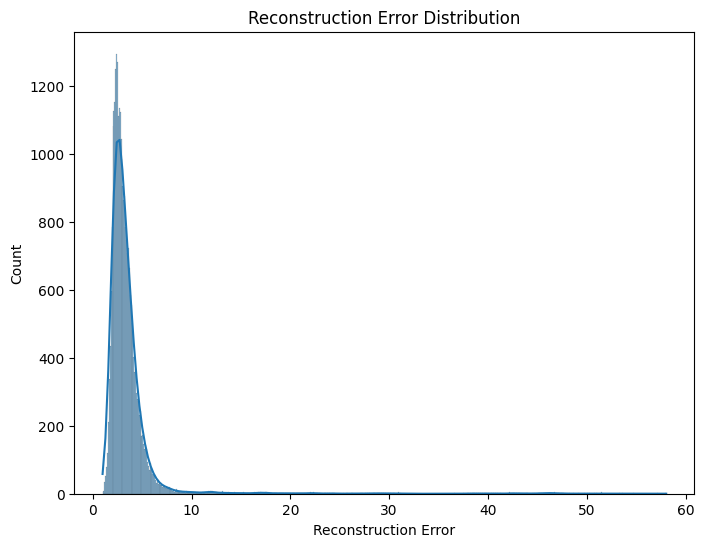

In [ ]:
#reconstruction log error
plt.figure(figsize=(8, 6))
sns.histplot(reconstruction_error, kde=True)
plt.xlabel('Reconstruction Error')
plt.ylabel('Count')
plt.title('Reconstruction Error Distribution')
plt.show()

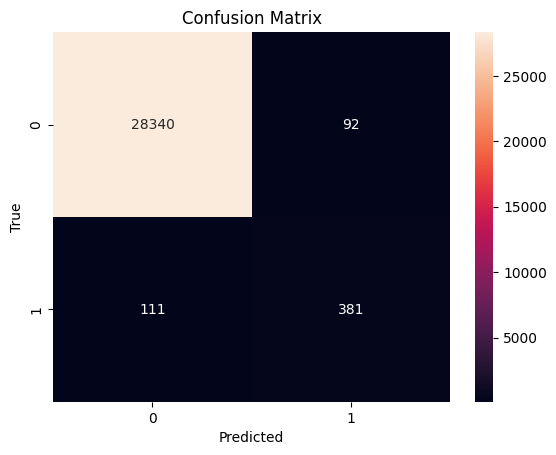

In [ ]:
cm = confusion_matrix(true_labels, predictions)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

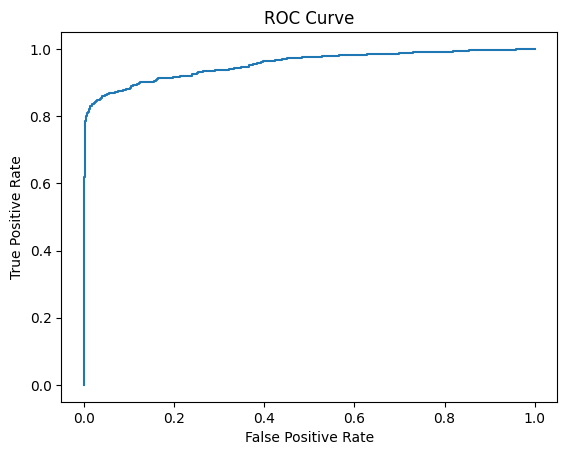

In [ ]:
fpr, tpr, thresholds = roc_curve(true_labels, reconstruction_error)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

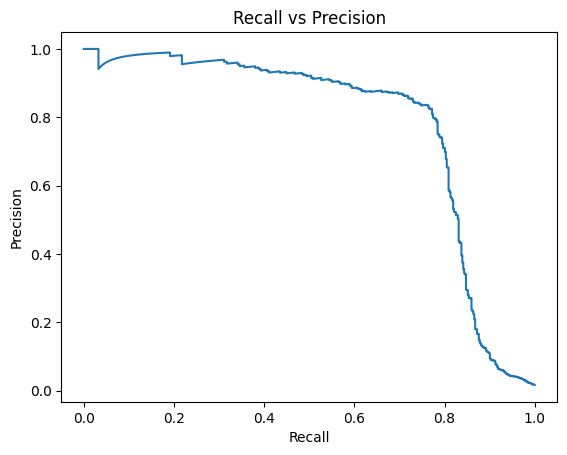

In [ ]:
precision, recall, thresholds = precision_recall_curve(true_labels, reconstruction_error)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Recall vs Precision')
plt.show()

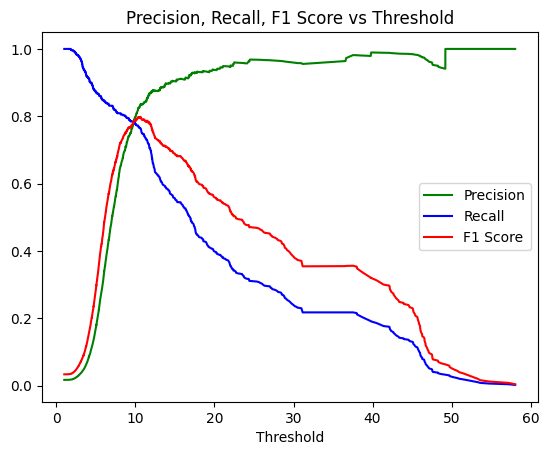

In [ ]:
#Plot recall, precision, f1 score
plt.plot(thresholds, precision[:-1], label='Precision', color='g')
plt.plot(thresholds, recall[:-1], label='Recall', color='b')
plt.plot(thresholds, 2 * precision[:-1] * recall[:-1] / (precision[:-1] + recall[:-1]), label='F1 Score', color='r')
plt.xlabel('Threshold')
plt.legend()
plt.title('Precision, Recall, F1 Score vs Threshold')
plt.show()

PERFORMING THE SAME TASK WITH VARIATIONAL AUTOENCODER

In the case of VAE, we are using Scaler as MinMaxScalar, because we need input to be in between 0 and 1.

In [ ]:
# Scaling the data
scaler = MinMaxScaler()
scaler.fit(train_data)  # Fit only on training data
scaled_train_data_1 = scaler.transform(train_data)
scaled_test_data_1 = scaler.transform(test_data)

This code defines a Variational Autoencoder (VAE) using PyTorch. The encoder compresses input data into a lower-dimensional latent space, represented by mean (mu) and log variance (logvar). During training, it samples latent vectors from a distribution defined by mu and logvar, aiding in generating diverse outputs. The decoder reconstructs the original data from these latent vectors. Batch normalization layers stabilize training, and LeakyReLU activations introduce non-linearity. The model employs a reparameterization trick for efficient training. However, the choice of activation functions and network architecture may impact reconstruction quality and latent space representation. Overall, it's a well-implemented VAE with potential for experimentation and application.

In [ ]:
#Making VAE model
class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(29, 20),
            nn.BatchNorm1d(20),
            nn.LeakyReLU(0.2),
            nn.Linear(20, 10),
            nn.BatchNorm1d(10),
            nn.LeakyReLU(0.2),
            nn.Linear(10, 5),
            nn.BatchNorm1d(5),
            nn.LeakyReLU(0.2),
        )

        self.mu = nn.Linear(5, 4)
        self.logvar = nn.Linear(5, 4)

        self.decoder = nn.Sequential(
            nn.Linear(4, 5),
            nn.BatchNorm1d(5),
            nn.LeakyReLU(),
            nn.Linear(5, 10),
            nn.BatchNorm1d(10),
            nn.LeakyReLU(0.2),
            nn.Linear(10, 20),
            nn.BatchNorm1d(20),
            nn.LeakyReLU(0.2),
            nn.Linear(20, 29),
            nn.BatchNorm1d(29),
            nn.Sigmoid()
        )

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        x = self.encoder(x)
        mu = self.mu(x)
        logvar = self.logvar(x)
        z = self.reparameterize(mu, logvar)
        x = self.decoder(z)
        return x, mu, logvar

#model summary
model = VAE()
print(model)

VAE(
  (encoder): Sequential(
    (0): Linear(in_features=29, out_features=20, bias=True)
    (1): BatchNorm1d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2)
    (3): Linear(in_features=20, out_features=10, bias=True)
    (4): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=10, out_features=5, bias=True)
    (7): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): LeakyReLU(negative_slope=0.2)
  )
  (mu): Linear(in_features=5, out_features=4, bias=True)
  (logvar): Linear(in_features=5, out_features=4, bias=True)
  (decoder): Sequential(
    (0): Linear(in_features=4, out_features=5, bias=True)
    (1): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): Linear(in_features=5, out_features=10, bias=True)
    (4): BatchNo

In [ ]:
#Loss function for VAE
def vae_loss(recon_x, x, mu, logvar):
    BCE = nn.functional.binary_cross_entropy(recon_x, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD

optimizer = Adam(model.parameters(), lr=learning_rate)

In [ ]:
#Preparing dataloader for VAE
train_tensor = torch.Tensor(scaled_train_data_1)
train_dataset = TensorDataset(train_tensor)
train_loader = DataLoader(train_dataset, batch_size=50, shuffle=True)

In [ ]:
#Training VAE
num_epochs = 10
model.train()
for epoch in range(num_epochs):
    for data in train_loader:
        inputs = torch.Tensor(scaled_train_data_1)
        optimizer.zero_grad()
        outputs, mu, logvar = model(inputs)
        loss = vae_loss(outputs, inputs, mu, logvar)
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch+1}, Loss: {(loss).item()}')

Epoch 1, Loss: 4365365.0
Epoch 2, Loss: 4365363.0
Epoch 3, Loss: 4365363.0
Epoch 4, Loss: 4365363.0
Epoch 5, Loss: 4365363.0
Epoch 6, Loss: 4365363.0
Epoch 7, Loss: 4365363.0
Epoch 8, Loss: 4365363.0
Epoch 9, Loss: 4365363.0
Epoch 10, Loss: 4365363.0


EVALUATION FOR VARIATIONAL AUTOENCODER FRAUD DETECTION MODEL

In [ ]:
#Testing VAE
model.eval()
test_tensor = torch.Tensor(scaled_test_data_1)
with torch.no_grad():
    reconstructions, mu, logvar = model(test_tensor)
    reconstruction_error_1 = torch.norm(test_tensor - reconstructions, dim=1).cpu().numpy()

# Assume a simple threshold to classify a transaction as fraudulent
threshold_1 = np.mean(reconstruction_error_1) + 2 * np.std(reconstruction_error_1)
predictions_1 = (reconstruction_error_1 > threshold_1).astype(int)

# True labels: 0 for normal, 1 for fraud. The first part of test_data is normal, followed by fraudulent
true_labels_1 = np.array([0] * test_df_normal.shape[0] + [1] * df_anomaly.shape[0])

# Print the classification report
print(classification_report(true_labels_1, predictions_1, target_names=["Normal", "Fraud"]))
print("F1 Score: ", f1_score(true_labels_1, predictions_1))
print("Precision: ", precision_score(true_labels_1, predictions_1))
print("Recall: ", recall_score(true_labels_1, predictions_1))
print("Prediction Score: ", np.mean(predictions_1 == true_labels_1))

              precision    recall  f1-score   support

      Normal       1.00      0.99      1.00     28432
       Fraud       0.71      0.73      0.72       492

    accuracy                           0.99     28924
   macro avg       0.85      0.86      0.86     28924
weighted avg       0.99      0.99      0.99     28924

F1 Score:  0.7195979899497488
Precision:  0.7117296222664016
Recall:  0.7276422764227642
Prediction Score:  0.9903540312543216


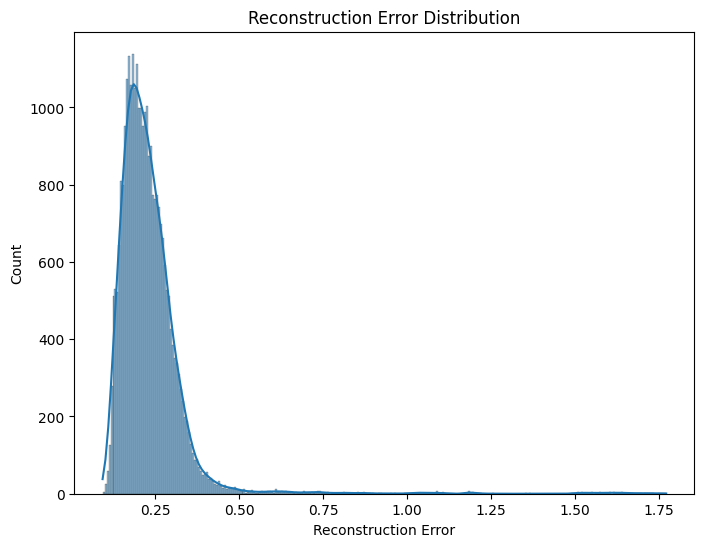

In [ ]:
#reconstruction log error
plt.figure(figsize=(8, 6))
sns.histplot(reconstruction_error_1, kde=True)
plt.xlabel('Reconstruction Error')
plt.ylabel('Count')
plt.title('Reconstruction Error Distribution')
plt.show()

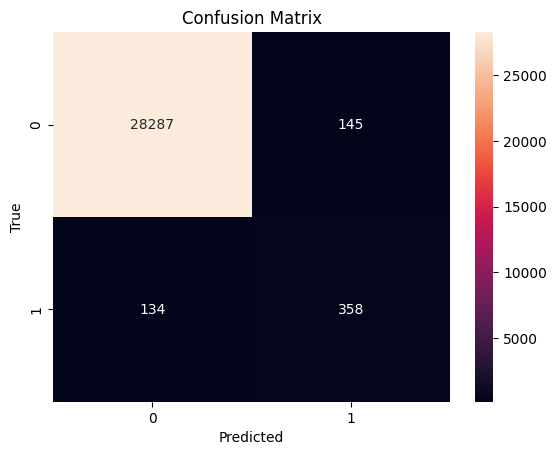

In [ ]:
#Confusion matrix
cm = confusion_matrix(true_labels_1, predictions_1)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

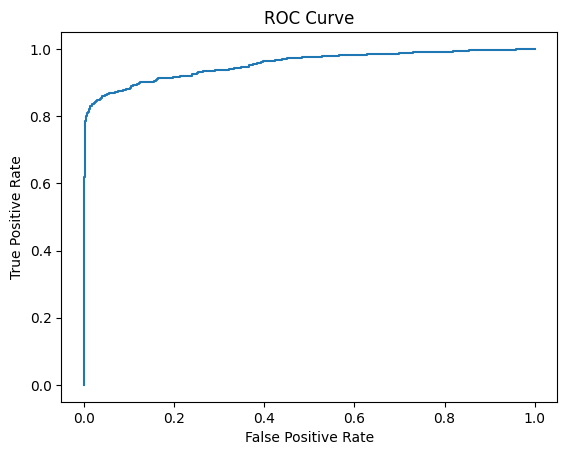

In [ ]:
#Plotting the ROC curve
fpr, tpr, thresholds = roc_curve(true_labels_1, reconstruction_error)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

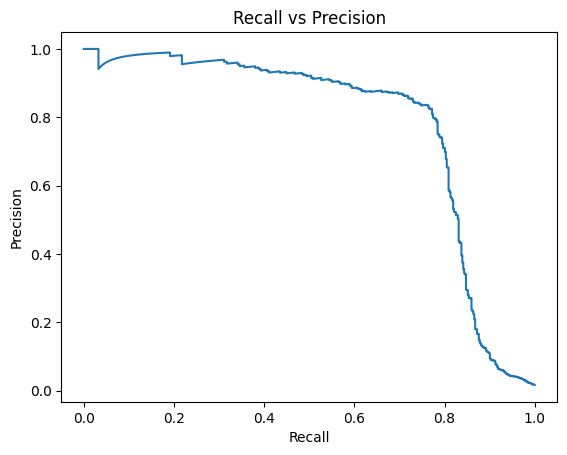

In [ ]:
#Plotting the recall vs precision
precision, recall, thresholds = precision_recall_curve(true_labels_1, reconstruction_error)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Recall vs Precision')
plt.show()

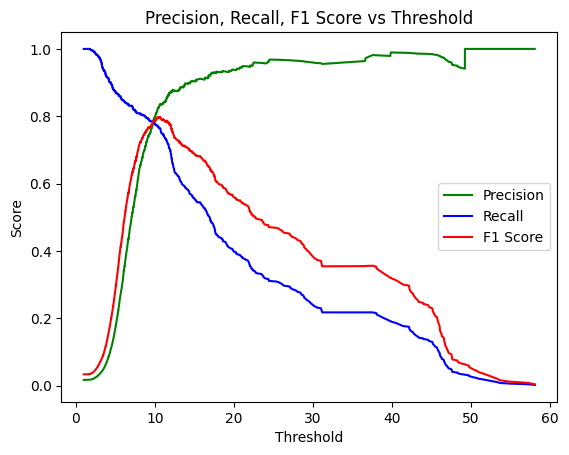

In [ ]:
#Plotting the recall, precision, f1 score
plt.plot(thresholds, precision[:-1], label='Precision', color='g')
plt.plot(thresholds, recall[:-1], label='Recall', color='b')
plt.plot(thresholds, 2 * precision[:-1] * recall[:-1] / (precision[:-1] + recall[:-1]), label='F1 Score', color='r')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.title('Precision, Recall, F1 Score vs Threshold')
plt.show()

END